<a href="https://colab.research.google.com/github/rsys-adsingh/Classification/blob/main/ClassificationAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.

Objective:

The objective of this project is to develop a machine learning model capable of learning from the measurements of iris flowers and accurately classifying them into their respective species. The model's primary goal is to automate the classification process based on the distinct characteristics of each iris species.

Project Details:

Iris Species: The dataset consists of iris flowers, specifically from the species setosa, versicolor, and virginica.
Key Measurements: The essential characteristics used for classification include sepal length, sepal width, petal length, and petal width.
Machine Learning Model: The project involves the creation and training of a machine learning model to accurately classify iris flowers based on their measurements.
This project's significance lies in its potential to streamline and automate the classification of iris species, which can have broader applications in botany, horticulture, and environmental monitoring.

In [90]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold

# Library used for ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [91]:
# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/rsys-adsingh/LinearRegression/9035acac57e2a5f33093d3721235c3c722fbb90b/iris.csv")

In [92]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [93]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  150
Number of columns are:  5


In [94]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [95]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 1


In [96]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
sepal.length,0
sepal.width,0
petal.length,0
petal.width,0
variety,0


In [97]:
# Dataset Columns
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [98]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.76,1.20,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [99]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in sepal.length is 35
No. of unique values in sepal.width is 23
No. of unique values in petal.length is 43
No. of unique values in petal.width is 22
No. of unique values in variety is 3


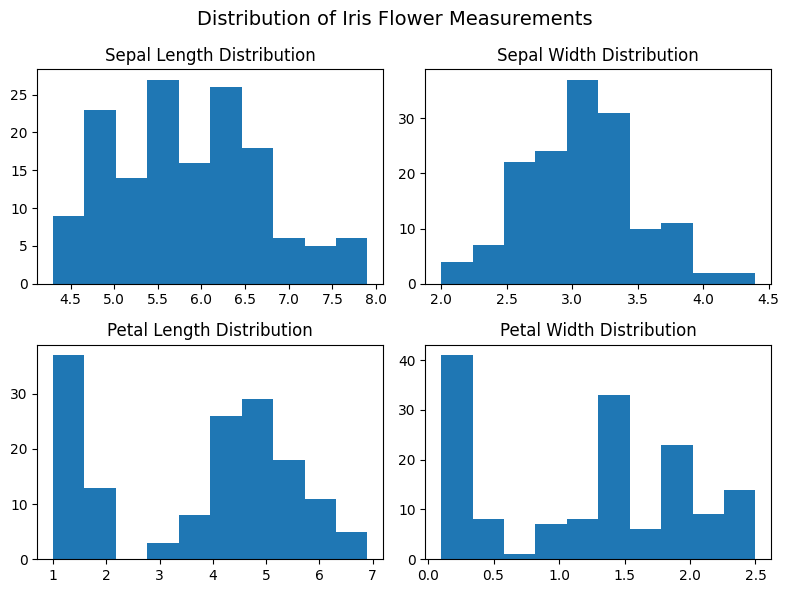

In [100]:
# Chart - 1 Histogram visualization code for distribution of numerical variables
# Create a figure with subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(df['sepal.length'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(df['sepal.width'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(df['petal.length'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(df['petal.width'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()

In [101]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'blue', 'green']
species = ['Setosa', 'Versicolor', 'Virginica']

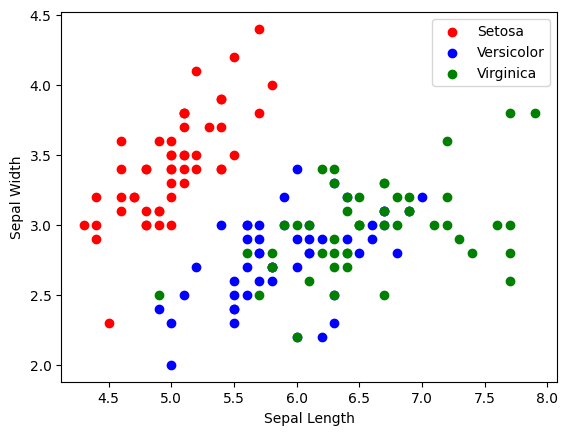

In [102]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['variety'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal.length'], x['sepal.width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

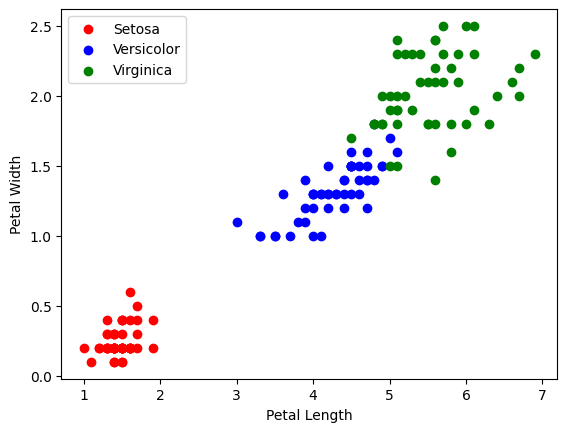

In [103]:
# Chart - 3 Scatter plot visualization code for Petal Length vs Petal Width.
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['variety'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['petal.length'], x['petal.width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

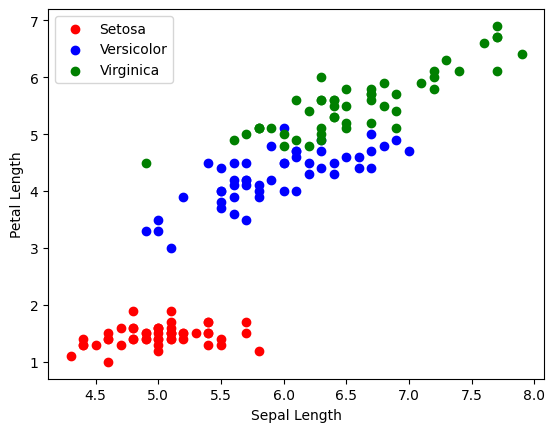

In [104]:
# Chart - 4 Scatter plot visualization code for Sepal Length vs Petal Length.
# Create a scatter plot for Sepal Length vs Petal Length for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['variety'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal.length'], x['petal.length'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

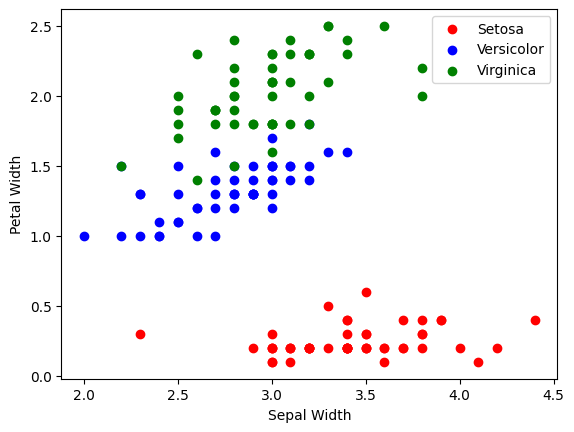

In [105]:
# Chart - 5 Scatter plot visualization code for Sepal Width vs Petal Width.
# Create a scatter plot for Sepal Width vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = df[df['variety'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['sepal.width'], x['petal.width'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

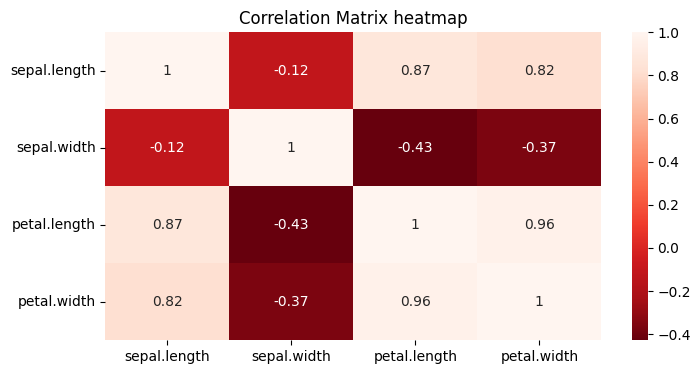

In [106]:
# Correlation Heatmap Visualization Code
# Drop the 'variety' column before calculating correlation
corr_matrix = df.drop('variety', axis=1).corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

**Feature Engineering & Data Pre-processing**

In [107]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
df['variety'] = le.fit_transform(df['variety'])

# Check the unique values in the 'Species' column after encoding
unique_species = df['variety'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Setosa' == 0, 'Versicolor' == 1, 'Virginica' == 2

Encoded Species Values:
[0 1 2]


In [108]:
# Defining the X and y
x=df.drop(columns=['variety'], axis=1)
y=df['variety']

In [109]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [110]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
variety,
1,37
0,35
2,33


**ML Model Implementation**

In [111]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [112]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

## **ML Model - 1 : Logistic regression**

In [113]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


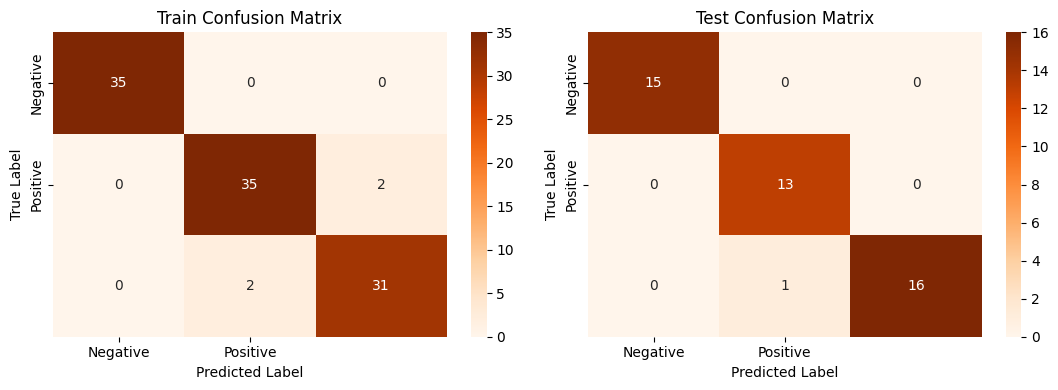


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.945946 | 0.945946 |   0.945946 |  37        |
| 2            |    0.939394 | 0.939394 |   0.939394 |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96178  | 0.96178  |   0.96178  | 105        |
| weighted avg |    0.961905 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.941176 |   0.969697 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [114]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [115]:
# Updated Evaluation metric Score Chart
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.961905
Precision Test,0.979365
Recall Train,0.961905
Recall Test,0.977778
Accuracy Train,0.961905
Accuracy Test,0.977778
F1 macro Train,0.961905
F1 macro Test,0.977853


**Cross- Validation & Hyperparameter Tuning**

In [116]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(x_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [117]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Confusion Matrix:


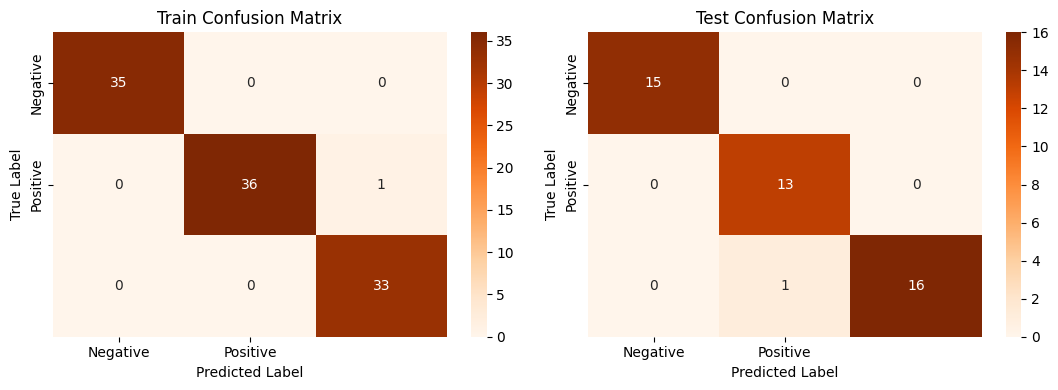


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.972973 |   0.986301 |  37        |
| 2            |    0.970588 | 1        |   0.985075 |  33        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990196 | 0.990991 |   0.990459 | 105        |
| weighted avg |    0.990756 | 0.990476 |   0.990482 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.941176 |   0.969697 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [118]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [119]:
score['Logistic regression tuned'] = lr_score2

**Which hyperparameter optimization technique have i used and why?**

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

In [120]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned
Precision Train,0.961905,0.990756
Precision Test,0.979365,0.979365
Recall Train,0.961905,0.990476
Recall Test,0.977778,0.977778
Accuracy Train,0.961905,0.990476
Accuracy Test,0.977778,0.977778
F1 macro Train,0.961905,0.990482
F1 macro Test,0.977853,0.977853


It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Logistic Regression models.

## **ML Model - 2 : Decision Tree**

In [121]:
# ML Model - 2 Implementation
dt_model = DecisionTreeClassifier(random_state=20)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


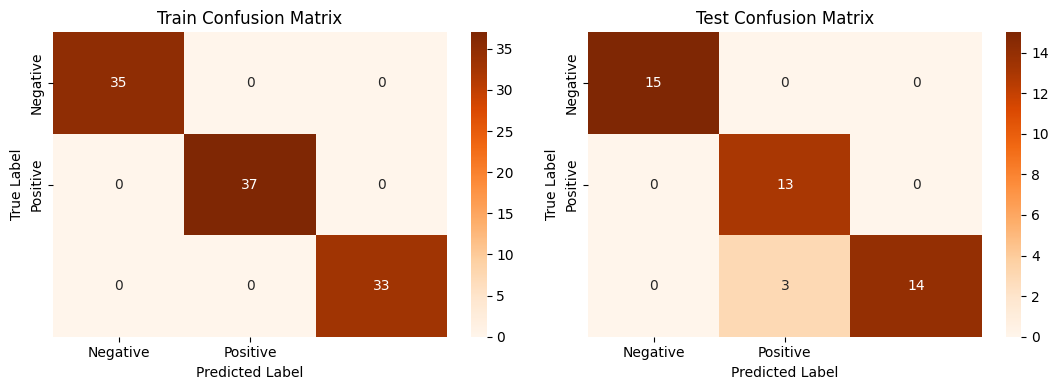


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.8125   | 1        |   0.896552 | 13        |
| 2            |    1        | 0.823529 |   0.903226 | 17        |
| accuracy     |    0.933333 | 0.933333 |   0.933333 |  0.933333 |
| m

In [122]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [123]:
# Updated Evaluation metric Score Chart
score['Decision Tree'] = dt_score
score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.961905,0.990756,1.000000
Precision Test,0.979365,0.979365,0.945833
Recall Train,0.961905,0.990476,1.000000
Recall Test,0.977778,0.977778,0.933333
Accuracy Train,0.961905,0.990476,1.000000
Accuracy Test,0.977778,0.977778,0.933333
F1 macro Train,0.961905,0.990482,1.000000
F1 macro Test,0.977853,0.977853,0.933556


**Cross- Validation & Hyperparameter Tuning**

In [124]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': np.int64(12), 'min_samples_split': np.int64(2)}


In [125]:
# Train a new model with the best hyperparameters
dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Confusion Matrix:


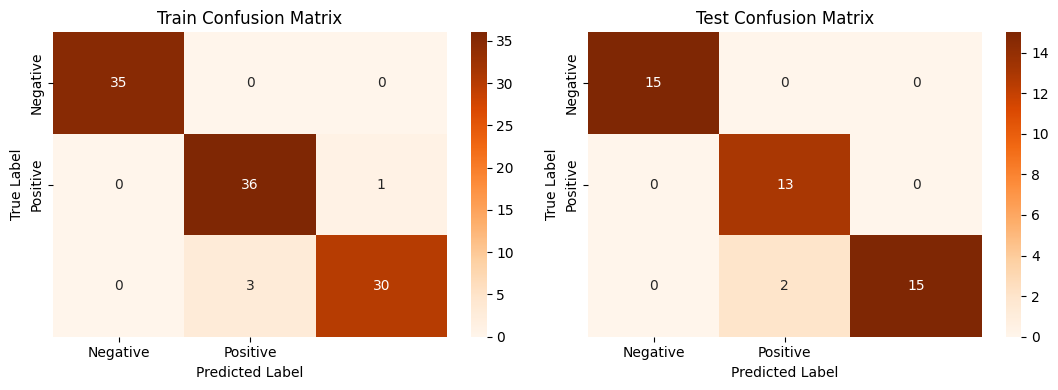


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.923077 | 0.972973 |   0.947368 |  37        |
| 2            |    0.967742 | 0.909091 |   0.9375   |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.963606 | 0.960688 |   0.961623 | 105        |
| weighted avg |    0.962756 | 0.961905 |   0.961811 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 1        |   0.928571 | 13        |
| 2            |    1        | 0.882353 |   0.9375   | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [126]:
# Visualizing evaluation Metric Score chart
dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [127]:
score['Decision Tree tuned'] = dt2_score

**Which hyperparameter optimization technique have i used and why?**  

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

In [128]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned
Precision Train,0.961905,0.990756,1.000000,0.962756
Precision Test,0.979365,0.979365,0.945833,0.961481
Recall Train,0.961905,0.990476,1.000000,0.961905
Recall Test,0.977778,0.977778,0.933333,0.955556
Accuracy Train,0.961905,0.990476,1.000000,0.961905
Accuracy Test,0.977778,0.977778,0.933333,0.955556
F1 macro Train,0.961905,0.990482,1.000000,0.961811
F1 macro Test,0.977853,0.977853,0.933556,0.955754


It appears that hyperparameter tuning didn't improved the performance of the Decision Tree model on the test set. The precision, recall, accuracy and F1 scores on the test set are less for the tuned Decision Tree model compare to the untuned Decision Tree model.

The tuned model is not overfitting like the untuned model.

## **ML Model - 3 : Random Forest**

In [129]:
# ML Model - 3 Implementation
rf_model = RandomForestClassifier(random_state=0)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


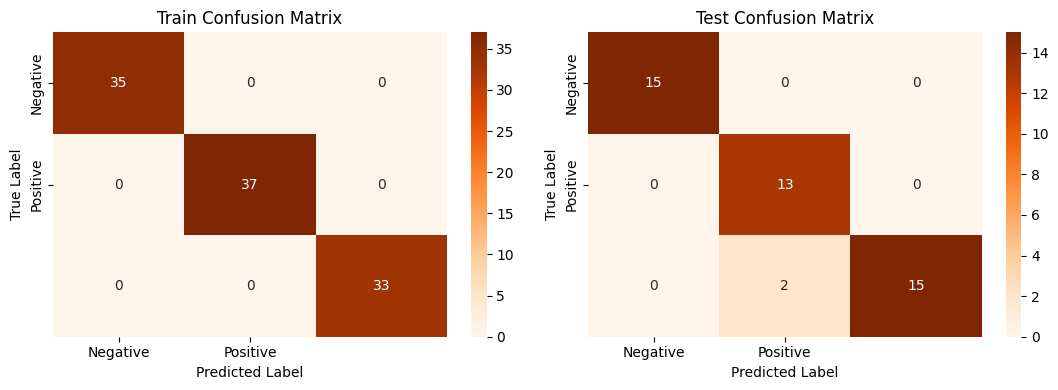


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        35 |
| 1            |           1 |        1 |          1 |        37 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 1        |   0.928571 | 13        |
| 2            |    1        | 0.882353 |   0.9375   | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [130]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [131]:
# Updated Evaluation metric Score Chart
score['Random Forest'] = rf_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest
Precision Train,0.961905,0.990756,1.000000,0.962756,1.000000
Precision Test,0.979365,0.979365,0.945833,0.961481,0.961481
Recall Train,0.961905,0.990476,1.000000,0.961905,1.000000
Recall Test,0.977778,0.977778,0.933333,0.955556,0.955556
Accuracy Train,0.961905,0.990476,1.000000,0.961905,1.000000
Accuracy Test,0.977778,0.977778,0.933333,0.955556,0.955556
F1 macro Train,0.961905,0.990482,1.000000,0.961811,1.000000
F1 macro Test,0.977853,0.977853,0.933556,0.955754,0.955754


**Cross- Validation & Hyperparameter Tuning**

In [132]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the RandomSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 11}


In [133]:
# Initialize model with best parameters
rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Confusion Matrix:


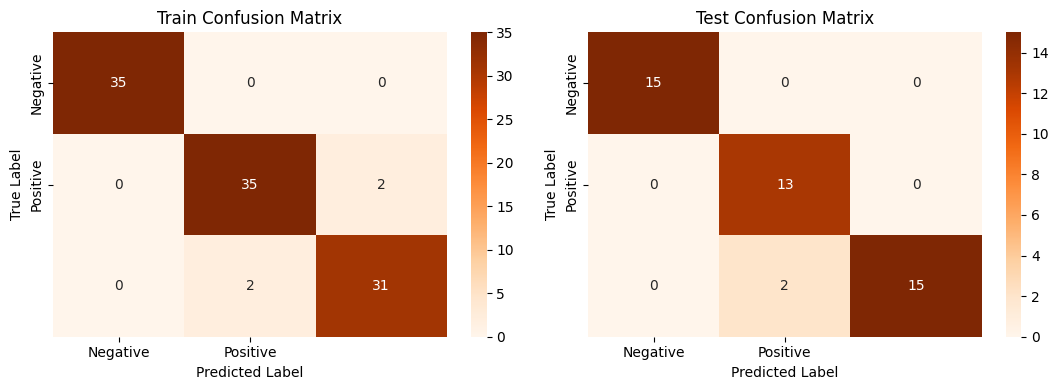


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    0.945946 | 0.945946 |   0.945946 |  37        |
| 2            |    0.939394 | 0.939394 |   0.939394 |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96178  | 0.96178  |   0.96178  | 105        |
| weighted avg |    0.961905 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.866667 | 1        |   0.928571 | 13        |
| 2            |    1        | 0.882353 |   0.9375   | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [134]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [135]:
score['Random Forest tuned'] = rf2_score

**Which hyperparameter optimization technique have i used and why?**

The hyperparameter optimization technique i used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

In [136]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned
Precision Train,0.961905,0.990756,1.000000,0.962756,1.000000,0.961905
Precision Test,0.979365,0.979365,0.945833,0.961481,0.961481,0.961481
Recall Train,0.961905,0.990476,1.000000,0.961905,1.000000,0.961905
Recall Test,0.977778,0.977778,0.933333,0.955556,0.955556,0.955556
Accuracy Train,0.961905,0.990476,1.000000,0.961905,1.000000,0.961905
Accuracy Test,0.977778,0.977778,0.933333,0.955556,0.955556,0.955556
F1 macro Train,0.961905,0.990482,1.000000,0.961811,1.000000,0.961905
F1 macro Test,0.977853,0.977853,0.933556,0.955754,0.955754,0.955754


It appears that hyperparameter tuning improved the performance of the Random Forest model on the train set. But the precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned Random Forest models.

## **ML Model - 4 : SVM (Support Vector Machine)**

In [137]:
# ML Model - 4 Implementation
svm_model = SVC(kernel='linear', random_state=0, probability=True)

# Model is trained (fit) and predicted in the evaluate model


Confusion Matrix:


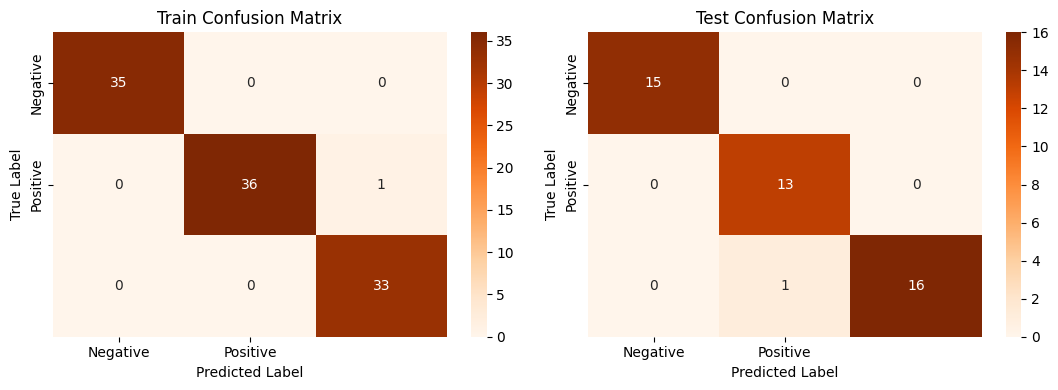


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.972973 |   0.986301 |  37        |
| 2            |    0.970588 | 1        |   0.985075 |  33        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990196 | 0.990991 |   0.990459 | 105        |
| weighted avg |    0.990756 | 0.990476 |   0.990482 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.941176 |   0.969697 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [138]:
# Visualizing evaluation Metric Score chart
svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [139]:
# Updated Evaluation metric Score Chart
score['SVM'] = svm_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM
Precision Train,0.961905,0.990756,1.000000,0.962756,1.000000,0.961905,0.990756
Precision Test,0.979365,0.979365,0.945833,0.961481,0.961481,0.961481,0.979365
Recall Train,0.961905,0.990476,1.000000,0.961905,1.000000,0.961905,0.990476
Recall Test,0.977778,0.977778,0.933333,0.955556,0.955556,0.955556,0.977778
Accuracy Train,0.961905,0.990476,1.000000,0.961905,1.000000,0.961905,0.990476
Accuracy Test,0.977778,0.977778,0.933333,0.955556,0.955556,0.955556,0.977778
F1 macro Train,0.961905,0.990482,1.000000,0.961811,1.000000,0.961905,0.990482
F1 macro Test,0.977853,0.977853,0.933556,0.955754,0.955754,0.955754,0.977853


**Cross- Validation & Hyperparameter Tuning**

In [140]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': np.arange(0.1, 10, 0.1),
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': np.arange(2, 6, 1)}

# Initialize the model
svm = SVC(random_state=0, probability=True)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV with kfold cross-validation
random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': np.int64(2), 'C': np.float64(0.8)}


In [141]:
# Initialize model with best parameters
svm_model2 = SVC(C = best_params['C'],
           kernel = best_params['kernel'],
           degree = best_params['degree'],
           random_state=0, probability=True)


Confusion Matrix:


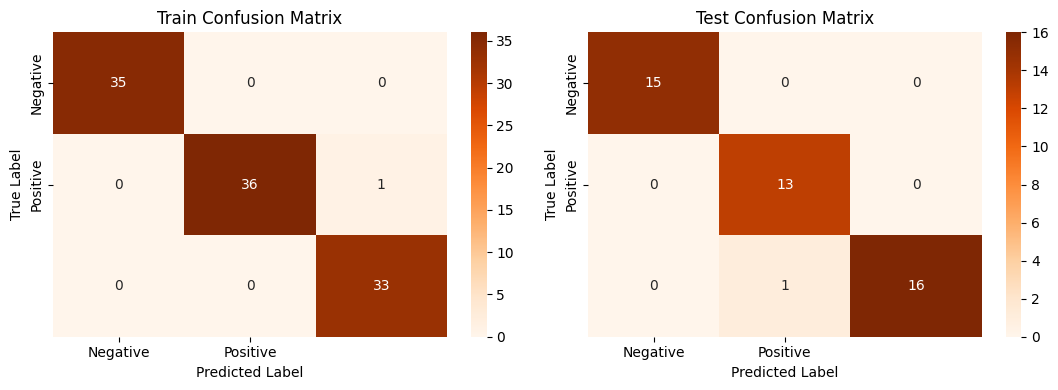


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  35        |
| 1            |    1        | 0.972973 |   0.986301 |  37        |
| 2            |    0.970588 | 1        |   0.985075 |  33        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990196 | 0.990991 |   0.990459 | 105        |
| weighted avg |    0.990756 | 0.990476 |   0.990482 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 15        |
| 1            |    0.928571 | 1        |   0.962963 | 13        |
| 2            |    1        | 0.941176 |   0.969697 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [142]:
# Visualizing evaluation Metric Score chart
svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [143]:
score['SVM tuned'] = svm2_score

**Which hyperparameter optimization technique have i used and why?**  

Here Randomized search is used as a hyperparameter optimization technique. Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

In [144]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Decision Tree tuned,Random Forest,Random Forest tuned,SVM,SVM tuned
Precision Train,0.961905,0.990756,1.000000,0.962756,1.000000,0.961905,0.990756,0.990756
Precision Test,0.979365,0.979365,0.945833,0.961481,0.961481,0.961481,0.979365,0.979365
Recall Train,0.961905,0.990476,1.000000,0.961905,1.000000,0.961905,0.990476,0.990476
Recall Test,0.977778,0.977778,0.933333,0.955556,0.955556,0.955556,0.977778,0.977778
Accuracy Train,0.961905,0.990476,1.000000,0.961905,1.000000,0.961905,0.990476,0.990476
Accuracy Test,0.977778,0.977778,0.933333,0.955556,0.955556,0.955556,0.977778,0.977778
F1 macro Train,0.961905,0.990482,1.000000,0.961811,1.000000,0.961905,0.990482,0.990482
F1 macro Test,0.977853,0.977853,0.933556,0.955754,0.955754,0.955754,0.977853,0.977853


It appears that hyperparameter tuning did not improve the performance of the SVM model on the test set. The precision, recall, accuracy and F1 scores on the test set are same for both tuned and untuned SVM models.

## **ML Model - 5 : Xtreme Gradient Boosting**